In [216]:
%matplotlib inline

import numpy as np
import pandas as pd
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [300]:
# Generating Data for training: 

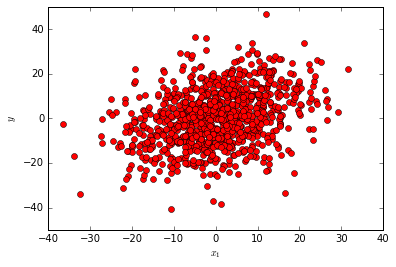

[0.3371906827225286, 1.1398081602427468]


In [360]:
x=10*np.transpose(np.array([np.random.randn(1000),np.random.randn(1000)]))
w1=np.random.rand()
w2=2*np.random.rand()
y=w1*x[:,0]+w2*x[:,1]+2*np.random.randn(1000)

plt.plot(x[:,0],y,'ro')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.show()

print [w1,w2]

In [361]:
class LinearRegressionClass():
    
    def __init__(self, learning_rate=0.01, stopping_criterion=0.01, max_iterations=1000,max_epochs=100,discounting=0.9,momentum_coef=0.1):
        self.learning_rate = learning_rate
        self.stopping_criterion = stopping_criterion
        self.max_iterations = max_iterations
        self.max_epochs = max_epochs
        self.discounting = discounting
        self.momentum_coef=momentum_coef
        self.w = None
    
    def SGD_fit(self,X,Y):
        dim=X.shape
        n=dim[0]
        m=dim[1]

        self.w=np.random.randn(m)
        loss=np.zeros(self.max_epochs)
        for i in range(0,self.max_epochs):
            for j in range(0,n):
                self.w-=self.learning_rate*X[j,:]*(np.dot(self.w,X[j,:]) - Y[j])/n
                loss[i]+=(np.dot(self.w,X[j,:]) - Y[j])**2
        plt.plot(loss[:self.max_epochs])
        plt.ylabel('Loss')
        plt.xlabel('# epochs')
        plt.show()
        return self.w
    
    def SGDMomentum_fit(self,X,Y):
        dim=X.shape
        n=dim[0]
        m=dim[1]
        
        dw=np.zeros(m)
        self.w=np.random.randn(m)
        loss=np.zeros(self.max_epochs)
        
        for i in range(0,self.max_epochs):
            for k in range(0,n):
                self.w-=self.learning_rate*X[k,:]*(np.dot(self.w,X[k,:]) - Y[k])/n
                self.w+=self.momentum_coef*dw
                dw=X[k,:]*(np.dot(self.w,X[k,:]) - Y[k])/n
                loss[i]+=(np.dot(self.w,X[k,:]) - Y[k])**2
        plt.plot(loss[:self.max_epochs])
        plt.ylabel('Loss')
        plt.xlabel('# epochs')
        plt.show()
        return self.w
    
    def SGDAdaGrad_fit(self,X,Y):
        dim=X.shape
        n=dim[0]
        m=dim[1]
    
        cumm_grad=np.zeros(m)+0.000001
        self.w=np.random.randn(m)
        loss=np.zeros(self.max_epochs)
        for i in range(0,self.max_epochs):
            for j in range(0,n):
                self.w-=X[j,:]/np.sqrt(cumm_grad)*self.learning_rate*(np.dot(self.w,X[j,:]) - Y[j])/n
                cumm_grad+=np.square(X[j,:]*(np.dot(self.w,X[j,:]) - Y[j])/n)
                loss[i]+=(np.dot(self.w,X[j,:]) - Y[j])**2
        plt.plot(loss[:self.max_epochs])
        plt.ylabel('Loss')
        plt.xlabel('# epochs')
        plt.show()
        return self.w
    
    def SGDRMSProp_fit(self,X,Y):
        dim=X.shape
        n=dim[0]
        m=dim[1]

        self.w=np.random.randn(m)
        v=0
        loss=np.zeros(self.max_epochs)
        for i in range(0,self.max_epochs):
            for j in range(0,n):
                v=self.discounting*v+(1-self.discounting)*np.sum((X[j,:]*(np.dot(self.w,X[j,:]) - Y[j])/n)**2)
                self.w-=self.learning_rate*X[j,:]*(np.dot(self.w,X[j,:]) - Y[j])/(n*np.sqrt(v))
                loss[i]+=(np.dot(self.w,X[j,:]) - Y[j])**2
        plt.plot(loss[:self.max_epochs])
        plt.ylabel('Loss')
        plt.xlabel('# epochs')
        plt.show()
        return self.w
    
    def BGD_fit(self,X,Y):
        dim=X.shape
        n=dim[0]
        m=dim[1]

        w=np.random.randn(m)
        grad=2*self.stopping_criterion*np.ones(m)
        loss=np.zeros(self.max_iterations)

        count=0
        while(np.linalg.norm(grad)>self.stopping_criterion and count<self.max_iterations):
            for k in range(0,n):
                loss[count]+=(Y[k]-np.dot(X[k,:],w))**2/n
            for j in range(0,m):
                grad[j]=0
                for k in range(0,n):
                    grad[j]+=(Y[k]-np.dot(X[k,:],w))*X[k,j]/n

                w[j]+=self.learning_rate*grad[j]
            count+=1
        self.w=w
        plt.plot(loss[:count])
        plt.ylabel('Loss')
        plt.xlabel('# iteration')
        plt.show()
        return self.w
    
    def predict(self,X):
        return np.dot(X,self.w)
    
    def score(self,X,Y):
        return 1-np.var(Y-np.dot(X,self.w))/np.var(Y)

In [362]:
linear_model=LinearRegressionClass()

In [ ]:
# Batch gradient descent:

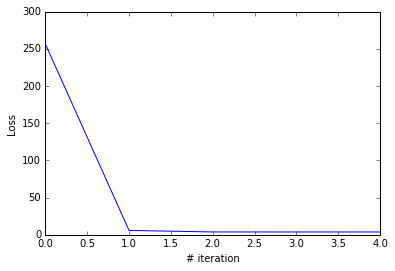

array([ 0.34068142,  1.1425577 ])

In [364]:
linear_model.BGD_fit(x,y)

In [365]:
linear_model.score(x,y)

0.97526996261797949

In [366]:
# Plain Stochastic gradient descent:

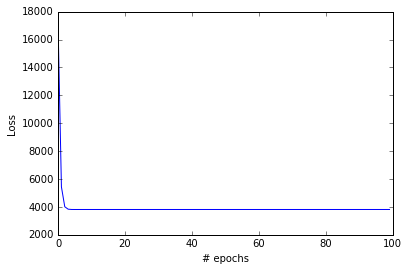

array([ 0.34295687,  1.14083439])

In [367]:
linear_model.SGD_fit(x,y)

In [368]:
linear_model.score(x,y)

0.97526378603308317

In [369]:
# Stochastic gradient descent with Momentum:

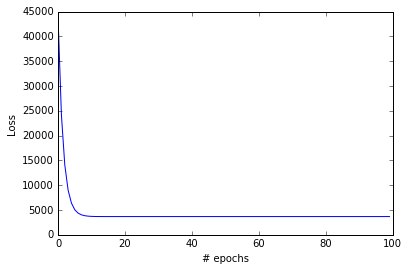

array([ 0.33845366,  1.14157953])

In [370]:
linear_model.learning_rate=0.1
linear_model.SGDMomentum_fit(x,y)

In [371]:
linear_model.score(x,y)

0.9752651671331658

In [372]:
# Stochastic gradient descent with Adaptive gradient:

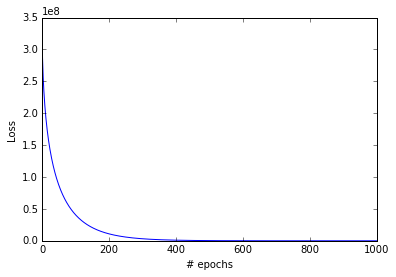

array([ 0.44031803,  1.13839845])

In [376]:
linear_model.max_epochs=1000
linear_model.learning_rate=0.1
linear_model.SGDAdaGrad_fit(x,y)

In [377]:
linear_model.score(x,y)

0.96833714045268471

In [297]:
# Stochastic gradient descent with RMS Propogation:

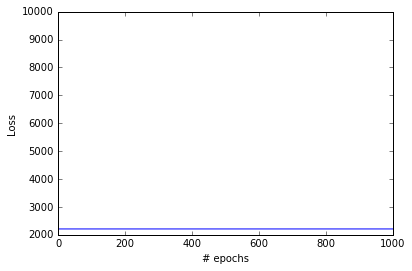

array([ 0.33765763,  0.97679994])

In [378]:
linear_model.SGDRMSProp_fit(x,y)

In [379]:
linear_model.score(x,y)

0.95697213286008243

In [380]:
# Import data from csv:

In [399]:
data=np.loadtxt('assignment1.csv',delimiter=',',skiprows=1)
data=data[~np.isnan(data).any(axis=1)]
np.random.shuffle(data)
n=data.shape[0]

n_train=int(0.7*n)
y_train=data[:n_train,1]
x_train=data[:n_train,2:]

x_min=np.min(x_train,axis=1)
x_max=np.max(x_train,axis=1)
y_min=np.min(y_train)
y_max=np.max(y_train)

for i in range(x_train.shape[1]):
    x_train[:,i]=(x_train[:,i]-x_min[i])/(x_max[i]-x_min[i])
y_train=(y_train-y_max)/(y_max-y_min)

y_test=data[n_train:,1]
x_test=data[n_train:,2:]

for i in range(x_train.shape[1]):
    x_test[:,i]=(x_test[:,i]-x_min[i])/(x_max[i]-x_min[i])
y_test=(y_test-y_max)/(y_max-y_min)

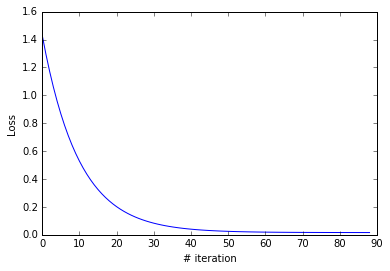

array([ 0.28069872, -0.8998867 , -0.0586929 , -0.79943487, -0.73219281,
        0.49311649, -0.86503279])

In [400]:
linear_model=LinearRegressionClass(learning_rate=0.1,max_epochs=1000)
linear_model.BGD_fit(x_train,y_train)

In [401]:
linear_model.score(x_test,y_test)

0.72922854989715924

In [402]:
from sklearn.linear_model import LinearRegression

In [403]:
model=LinearRegression()
model.fit(x_train,y_train)
model.coef_
model.score(x_test,y_test)

0.78856348491988471

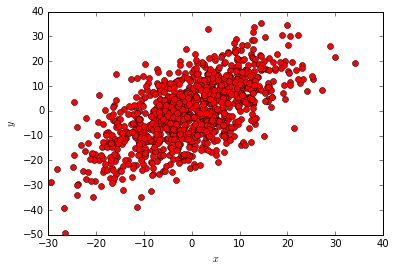

0.789795484537


In [435]:
x=10*np.random.randn(1000)
w=2*np.random.rand()
y=w*x+10*np.random.randn(1000)


plt.close()
plt.plot(x,y,'ro')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

print w

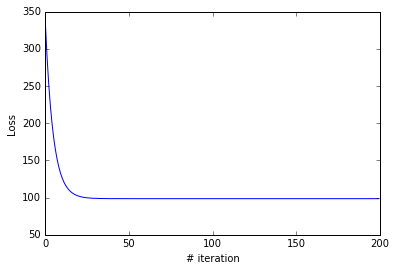

0.815426606956


In [440]:
learning_rate=0.001
stopping_criterion=0.0000001
max_iterations=1000

n=x.size

w=np.random.randn()
grad=2*stopping_criterion
loss=np.zeros(max_iterations)

count=0
while(abs(grad)>stopping_criterion and count<max_iterations):
    grad=0
    for k in range(0,n):
        loss[count]+=(y[k]-x[k]*w)**2/n
        grad+=(y[k]-x[k]*w)*x[k]/n

    w+=learning_rate*grad
    count+=1
plt.plot(loss[:count])
plt.ylabel('Loss')
plt.xlabel('# iteration')
plt.show()

print w